In [7]:
import plotly_express as px
import pandas as pd
import matplotlib.pyplot as plt


def gerar_histograma(df,coluna_X,coluna_Y = None):
    return px.histogram(df,text_auto= True ,x=coluna_X, title=f"Histograma por {coluna_X}", y=coluna_Y, color="MANUTENÇÃO")

def analise_exploratoria(df, tabela = None):
    df.info()
    print("\n")
    print("Estatísticas Descritivas")
    display(df.describe())
    print("\n")
    print("Correlação")
    display(df.corr())
    print("\n")
    if tabela:
        print(f"Tabela - {tabela}")
        df.tabela.describe().to_frame()


def show_info(df):
    print(df.columns)
    display(df)
    analise_exploratoria(df)

def show_dataframe(txt,df):
    print(txt)
    display(df)


def count_table(df, coluna):
    return df[coluna].value_counts().to_frame()


In [8]:

df_medios = pd.read_excel("/home/pedrov/Documentos/GitHub/Engenharia-Eletrica-UFF/Jedi Cyberpunk 2024/Ciencia de dados/datasets/Acompanhamento MNT - Grandes e Médios 2024.xlsx", sheet_name=0,skiprows=1)
df_medios.head()


/home/pedrov/.local/lib/python3.11/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning:

Data Validation extension is not supported and will be removed



,Nº OS,EMBARCAÇÃO,DATA DE ABERTURA,DESCRIÇÃO DA FALHA,EQUIPAMENTO,MANUTENÇÃO,SERVIÇO EXECUTADO,DATA INÍCIO DA EXECUÇÃO,HORA INICIAL,RESPONSÁVEL\n PELA\n EXECUÇÃO,OFICINA,FINALIZADO,DATA CONCLUSÃO,HORA FINAL,FORA DE OPERAÇÃO,OBSERVAÇÕES
0,1,CICLONE,2023-01-27 00:00:00,Estrutura metálica do suspiro da caixa mar de ...,CASCO,CORRETIVA,NaN,NaN,NaN,NaN,NaN,NÃO,NaN,NaN,NaN,Informação relatada através do grupo Manutenca...
1,2,CICLONE,2023-04-17 00:00:00,Ar condicionado do camarote do marinheiro esta...,AR CONDICIONADO,CORRETIVA,Substituição de dois sensores da central de ar...,2023-03-14 00:00:00,18:00:00,Benilton,Beny refrigeração,SIM,2023-03-14 00:00:00,20:50:00,NaN,RC 19 enviada dia 17/04/2023. RC 17 enviada em...
2,3,MERLIM,2023-05-14 00:00:00,Eixo de BB com trepidação. Hélice avariado.,LINHA DE EIXO BB,CORRETIVA,NaN,NaN,NaN,NaN,NaN,NÃO,NaN,NaN,NaN,"Informação relatada no grupo Manut Viagem, dia..."
3,4,CICLONE,2023-05-23 00:00:00,Foi danificado um rolete de acoplamento da cai...,REVERSOR BE,CORRETIVA,NaN,NaN,NaN,NaN,NaN,NÃO,NaN,NaN,NaN,RC 19 enviada dia 23/05/2023. Relatório RM MOT...
4,5,VENDAVAL,2023-07-11 00:00:00,O eixo do leme CL está com uma folga longitudi...,SISTEMA DE GOVERNO LC,CORRETIVA,NaN,NaN,NaN,NaN,NaN,NÃO,NaN,NaN,NaN,RC 19 enviada dia 11/07/2023.


## Maiores valores

,count
EQUIPAMENTO,
AR CONDICIONADO,44
MCP BB,38
ELETRICA/ELETRONICO,35
MCP BE,34
MCA BE,27
MCA BB,24
EQUIPAMENTOS NAUTICOS,22
ELETRODOMESTICOS,20
MCP LC,19


,count
EMBARCAÇÃO,
VENDAVAL,78
TEMPESTADE,70
VENTANIA,56
TORNADO,52
TUFAO,48
NEBLINA,40
VIGO MAXIMUS,32
MERLIM,30
NEW TROVAO,28


<Axes: xlabel='FINALIZADO'>

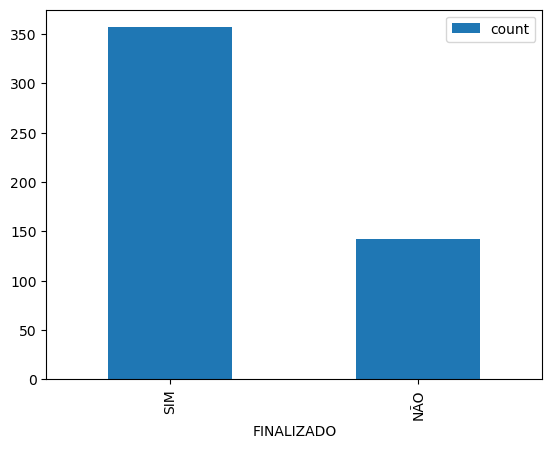

In [9]:
display(count_table(df_medios, "EQUIPAMENTO"))
display(count_table(df_medios,"EMBARCAÇÃO"))
display(count_table(df_medios,"FINALIZADO").plot(kind="bar"))

In [13]:

cols_analise = ["EMBARCAÇÃO","EQUIPAMENTO","FINALIZADO","OFICINA"]

for coluna in cols_analise:
    grafico_barcos = gerar_histograma(df_medios, coluna)
    grafico_barcos.show()
    grafico_barcos.write_html(f"./graficos_{coluna}.html")

#mostrar apenas o que tiver finalizaod com SIM
df_medios["FINALIZADO"].value_counts()

FINALIZADO
SIM    357
NÃO    142
Name: count, dtype: int64

## Manutencão por oficina

In [11]:
display(df_medios.groupby(["OFICINA","EQUIPAMENTO","MANUTENÇÃO"])["FINALIZADO"].sum().to_frame())
df_medios.groupby(["OFICINA","EQUIPAMENTO","MANUTENÇÃO"])["FINALIZADO"].sum().to_excel("./grupamento.xlsx")

FINALIZADO
OFICINA                        EQUIPAMENTO      MANUTENÇÃO                                                   
Autotrac                       COMUNICAÇÃO      CORRETIVA                                                 SIM
BMH                            ACOMODAÇÕES      CORRETIVA                                                 SIM
                               AR CONDICIONADO  CORRETIVA   SIMSIMSIMSIMSIMSIMSIMSIMSIMSIMSIMSIMSIMSIMSIMS...
                                                PREVENTIVA                                 SIMSIMSIMSIMSIMSIM
                               ELETRODOMESTICOS CORRETIVA                   SIMSIMSIMSIMSIMSIMSIMSIMSIMSIMSIM
...                                                                                                       ...
tripulação                     BOMBAS           CORRETIVA                                                 SIM
                               ESTRUTURA        CORRETIVA                                                 SIM
                               GUINCHO DE POPA  PREVENTIVA                                             SIMSIM
                               LEME             PREVENTIVA                                                SIM
tripulação/ Eletrica/ Mecanica GUINCHO DE POPA  CORRETIVA                                                 NÃO

[165 rows x 1 columns]